## 8 tips for Pandas and Python for Geospatial People. <br>
In this notebook I will share some tips that I have picked up from using Pandas and GeoPandas. Increasingly using Pandas / GeoPandas is a great way to work with vector data that you might traditionally interact with in a desktop GIS software. These tips are from questions that I have been asked on training courses http://www.acgeospatial.co.uk/training/ or I have just picked up from stackoverflow or experimentation. Where possible I have acknowledged the source.

# Tip 1
<br></br>
### Downloading data (and extracting it)
<br> </br>
In this example I am downloading a zip file from natutalearthdata.com. It contains a shapefile

In [1]:
#credit https://stackoverflow.com/questions/9419162/download-returned-zip-file-from-url
import requests, zipfile, io ## Python imports

# set the url to the data
url = 'https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip'


# Use requests to download that url and zipfile to extract it
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [2]:
## find out what we have got
print(z.namelist())

['ne_50m_admin_0_countries.README.html', 'ne_50m_admin_0_countries.VERSION.txt', 'ne_50m_admin_0_countries.cpg', 'ne_50m_admin_0_countries.dbf', 'ne_50m_admin_0_countries.prj', 'ne_50m_admin_0_countries.shp', 'ne_50m_admin_0_countries.shx']


# Tip 2
<br></br>
### Load and plot in GeoPandas
<br></br>
This is simpler than you would perhaps have thought?

In [3]:
#load into geopandas
import geopandas as gpd
shape_data = "ne_50m_admin_0_countries.shp" # refer to z.namelist()
gdf = gpd.read_file(shape_data) # read in the file
print (gdf.head()) # print the head (Bonus tip! try gdf.tail() to get the lat 5 records, OR gdf.head(10) for the first 10)

        featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          3   Zimbabwe    ZWE         0      2   
1  Admin-0 country          1          3     Zambia    ZMB         0      2   
2  Admin-0 country          1          3      Yemen    YEM         0      2   
3  Admin-0 country          3          2    Vietnam    VNM         0      2   
4  Admin-0 country          5          3  Venezuela    VEN         0      2   

                TYPE      ADMIN ADM0_A3  \
0  Sovereign country   Zimbabwe     ZWE   
1  Sovereign country     Zambia     ZMB   
2  Sovereign country      Yemen     YEM   
3  Sovereign country    Vietnam     VNM   
4  Sovereign country  Venezuela     VEN   

                         ...                                  NAME_KO  \
0                        ...                             ì§ë°ë¸ì¨   
1                        ...                                ì ë¹ì   
2                        ...                   

# Tip 1 and 2 combined!
### Thanks to @James_O_Connor1 for the tip!
<br></br>
You can load into GeoPandas directly with gpd.GeoDataFrame.from_file

In [4]:
gdf = gpd.GeoDataFrame.from_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip')

In [5]:
# Get the projection - we will need it later (we will assign it to a variable called projection)
print(gdf.crs)
projection = gdf.crs

{'init': 'epsg:4326'}


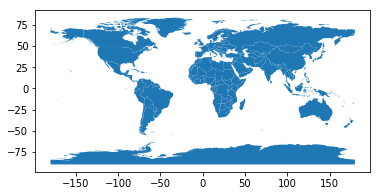

In [6]:
## plotting can be done in just one line. 
## Go here for more details on simple plots
## https://github.com/acgeospatial/Satellite_Imagery_Python/blob/master/geopandas_blog.ipynb
## scaling, attributes, legends, mulitple layers all covered
%matplotlib inline
gdf.plot()

# Tip 3 removing columns
<br></br>
### You don't always want to keep all the data - and you don't have to

In [7]:
## find out what columns you have (95 in this case)
print(gdf.dtypes)

featurecla     object
scalerank       int64
LABELRANK       int64
SOVEREIGNT     object
SOV_A3         object
ADM0_DIF        int64
LEVEL           int64
TYPE           object
ADMIN          object
ADM0_A3        object
GEOU_DIF        int64
GEOUNIT        object
GU_A3          object
SU_DIF          int64
SUBUNIT        object
SU_A3          object
BRK_DIFF        int64
NAME           object
NAME_LONG      object
BRK_A3         object
BRK_NAME       object
BRK_GROUP      object
ABBREV         object
POSTAL         object
FORMAL_EN      object
FORMAL_FR      object
NAME_CIAWF     object
NOTE_ADM0      object
NOTE_BRK       object
NAME_SORT      object
               ...   
ABBREV_LEN      int64
TINY            int64
HOMEPART        int64
MIN_ZOOM      float64
MIN_LABEL     float64
MAX_LABEL     float64
NE_ID           int64
WIKIDATAID     object
NAME_AR        object
NAME_BN        object
NAME_DE        object
NAME_EN        object
NAME_ES        object
NAME_FR        object
NAME_EL   

In [8]:
# remove just 1 column 'NAME_ZH'
gdf.drop('NAME_ZH', axis=1, inplace=True)
print (gdf.dtypes)

featurecla     object
scalerank       int64
LABELRANK       int64
SOVEREIGNT     object
SOV_A3         object
ADM0_DIF        int64
LEVEL           int64
TYPE           object
ADMIN          object
ADM0_A3        object
GEOU_DIF        int64
GEOUNIT        object
GU_A3          object
SU_DIF          int64
SUBUNIT        object
SU_A3          object
BRK_DIFF        int64
NAME           object
NAME_LONG      object
BRK_A3         object
BRK_NAME       object
BRK_GROUP      object
ABBREV         object
POSTAL         object
FORMAL_EN      object
FORMAL_FR      object
NAME_CIAWF     object
NOTE_ADM0      object
NOTE_BRK       object
NAME_SORT      object
               ...   
LONG_LEN        int64
ABBREV_LEN      int64
TINY            int64
HOMEPART        int64
MIN_ZOOM      float64
MIN_LABEL     float64
MAX_LABEL     float64
NE_ID           int64
WIKIDATAID     object
NAME_AR        object
NAME_BN        object
NAME_DE        object
NAME_EN        object
NAME_ES        object
NAME_FR   

In [9]:
# Drop all the columns with that start with NAME or contain NAME
# Reference https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe

gdf.drop(list(gdf.filter(regex = 'NAME')), axis = 1, inplace = True)
print (gdf.dtypes)

featurecla     object
scalerank       int64
LABELRANK       int64
SOVEREIGNT     object
SOV_A3         object
ADM0_DIF        int64
LEVEL           int64
TYPE           object
ADMIN          object
ADM0_A3        object
GEOU_DIF        int64
GEOUNIT        object
GU_A3          object
SU_DIF          int64
SUBUNIT        object
SU_A3          object
BRK_DIFF        int64
BRK_A3         object
BRK_GROUP      object
ABBREV         object
POSTAL         object
FORMAL_EN      object
FORMAL_FR      object
NOTE_ADM0      object
NOTE_BRK       object
MAPCOLOR7       int64
MAPCOLOR8       int64
MAPCOLOR9       int64
MAPCOLOR13      int64
POP_EST         int64
               ...   
WIKIPEDIA       int64
FIPS_10_       object
ISO_A2         object
ISO_A3         object
ISO_A3_EH      object
ISO_N3         object
UN_A3          object
WB_A2          object
WB_A3          object
WOE_ID          int64
WOE_ID_EH       int64
WOE_NOTE       object
ADM0_A3_IS     object
ADM0_A3_US     object
ADM0_A3_UN

# Tip 4 Renaming Columns
<br></br>
### How often in a GIS have you created a field that you then wish you could rename, but you can't. That is annoying! In Pandas we can rename a field in one line of code

In [10]:
# Remane ADMIN to become C_NAME
gdf.rename(columns={"ADMIN": "C_Name"}, inplace=True)
print (gdf.dtypes)

featurecla     object
scalerank       int64
LABELRANK       int64
SOVEREIGNT     object
SOV_A3         object
ADM0_DIF        int64
LEVEL           int64
TYPE           object
C_Name         object
ADM0_A3        object
GEOU_DIF        int64
GEOUNIT        object
GU_A3          object
SU_DIF          int64
SUBUNIT        object
SU_A3          object
BRK_DIFF        int64
BRK_A3         object
BRK_GROUP      object
ABBREV         object
POSTAL         object
FORMAL_EN      object
FORMAL_FR      object
NOTE_ADM0      object
NOTE_BRK       object
MAPCOLOR7       int64
MAPCOLOR8       int64
MAPCOLOR9       int64
MAPCOLOR13      int64
POP_EST         int64
               ...   
WIKIPEDIA       int64
FIPS_10_       object
ISO_A2         object
ISO_A3         object
ISO_A3_EH      object
ISO_N3         object
UN_A3          object
WB_A2          object
WB_A3          object
WOE_ID          int64
WOE_ID_EH       int64
WOE_NOTE       object
ADM0_A3_IS     object
ADM0_A3_US     object
ADM0_A3_UN

# Tip 5 Changing a column's datatype
<br></br>
### Not something I do much, but sometimes you want to move from a float to an int - and in Pandas this can be done!

In [11]:
# Change MIN_ZOOM to integer (tip in Pandas Strings in the columns are assigned the type object)
gdf = gdf.astype({'MIN_ZOOM': 'int32'})
print(gdf.dtypes)

featurecla     object
scalerank       int64
LABELRANK       int64
SOVEREIGNT     object
SOV_A3         object
ADM0_DIF        int64
LEVEL           int64
TYPE           object
C_Name         object
ADM0_A3        object
GEOU_DIF        int64
GEOUNIT        object
GU_A3          object
SU_DIF          int64
SUBUNIT        object
SU_A3          object
BRK_DIFF        int64
BRK_A3         object
BRK_GROUP      object
ABBREV         object
POSTAL         object
FORMAL_EN      object
FORMAL_FR      object
NOTE_ADM0      object
NOTE_BRK       object
MAPCOLOR7       int64
MAPCOLOR8       int64
MAPCOLOR9       int64
MAPCOLOR13      int64
POP_EST         int64
               ...   
WIKIPEDIA       int64
FIPS_10_       object
ISO_A2         object
ISO_A3         object
ISO_A3_EH      object
ISO_N3         object
UN_A3          object
WB_A2          object
WB_A3          object
WOE_ID          int64
WOE_ID_EH       int64
WOE_NOTE       object
ADM0_A3_IS     object
ADM0_A3_US     object
ADM0_A3_UN

# Tip 6 Parse an attribute query
<br></br>
### Want to know something about our attribute data? In Pandas you can

In [12]:
## Credit https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
## Get the polygon of Belgium
gdf_Bel = gdf.loc[gdf['C_Name'] == 'Belgium']
print(gdf_Bel.head())

          featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
217  Admin-0 country          1          2    Belgium    BEL         0      2   

                  TYPE   C_Name ADM0_A3  \
217  Sovereign country  Belgium     BEL   

                           ...                          LONG_LEN ABBREV_LEN  \
217                        ...                                 7          5   

    TINY  HOMEPART MIN_ZOOM MIN_LABEL  MAX_LABEL       NE_ID WIKIDATAID  \
217  -99         1        0       4.0        9.0  1159320389        Q31   

                                              geometry  
217  POLYGON ((4.226171875000006 51.386474609375, 4...  

[1 rows x 67 columns]


# Tip 7 convert a Pandas object (with a Geometry field) back to a GeoPandas object
### We have done a fair amount of data manipulation, and the result is the dataframe we wanted, but we want it to be a GeoPandas object (because we are spatial people right?)

In [13]:
## Along the way we have lost our geometry to check this print the type
print(type(gdf_Bel))

<class 'pandas.core.frame.DataFrame'>


<class 'geopandas.geodataframe.GeoDataFrame'>
{'init': 'epsg:4326'}


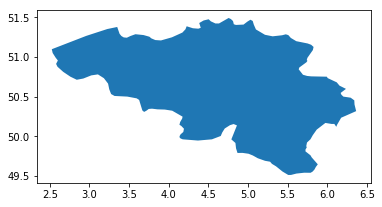

In [14]:
## convert to a GeoPandas object
#projection = {'init': 'epsg:4326'} ## remember we assigned this before in tip 2 (cell 4)
gdf_Bel = gpd.GeoDataFrame(gdf_Bel, crs = projection, geometry = 'geometry')
print(type(gdf_Bel))
print(gdf_Bel.crs)
gdf_Bel.plot()

# Tip 8
<br></br>
### Save our work
<br></br>
we have come a fair old way. Now its time to save our work. Back to a shapefile? You don't have to
http://geopandas.org/io.html
<br></br>
But in this example we will

In [15]:
gdf_Bel.to_file("Belgium.shp")

You can pretty much do anything you like in Pandas, these are really just some simple examples. I really hope you find it useful. I run training courses in Geospatial Python http://www.acgeospatial.co.uk/training/ please do check them out. If you want more information email me on info@acgeospatial.co.uk

Oh and if you were wondering where the zip, extracted zip and the Belgium shapefile are now stored have a look in the same place that you have run this notebook!